https://docs.dask.org/en/stable/10-minutes-to-dask.html

# Libraries 

In [1]:
import numpy as np
import pandas as pd

from dask.distributed import Client
import dask.dataframe as dd
import dask.array as da
import dask.bag as db

# Client

In [2]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 8,Total memory: 8.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:50608,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 8.00 GiB
Comm: tcp://127.0.0.1:50619,Total threads: 2
Dashboard: http://127.0.0.1:50623/status,Memory: 2.00 GiB
Nanny: tcp://127.0.0.1:50611,


# Dask DataFrame 

In [3]:
index = pd.date_range("2021-09-01", periods=1000, freq="1H")
df = pd.DataFrame({"a": np.arange(1000), "b": list("abcaddbefg" * 100)}, index=index)
ddf = dd.from_pandas(df, npartitions=10)
ddf

,a,b
npartitions=10,,
2021-09-01 00:00:00,int64,object
2021-09-05 04:00:00,...,...
...,...,...
2021-10-08 12:00:00,...,...
2021-10-12 15:00:00,...,...


In [4]:
ddf.divisions

(Timestamp('2021-09-01 00:00:00', freq='H'),
 Timestamp('2021-09-05 04:00:00', freq='H'),
 Timestamp('2021-09-09 08:00:00', freq='H'),
 Timestamp('2021-09-13 12:00:00', freq='H'),
 Timestamp('2021-09-17 16:00:00', freq='H'),
 Timestamp('2021-09-21 20:00:00', freq='H'),
 Timestamp('2021-09-26 00:00:00', freq='H'),
 Timestamp('2021-09-30 04:00:00', freq='H'),
 Timestamp('2021-10-04 08:00:00', freq='H'),
 Timestamp('2021-10-08 12:00:00', freq='H'),
 Timestamp('2021-10-12 15:00:00', freq='H'))

In [5]:
len(ddf.divisions)

11

In [6]:
ddf.partitions[1]

,a,b
npartitions=1,,
2021-09-05 04:00:00,int64,object
2021-09-09 08:00:00,...,...


In [7]:
ddf["b"]

Dask Series Structure:
npartitions=10
2021-09-01 00:00:00    object
2021-09-05 04:00:00       ...
                        ...  
2021-10-08 12:00:00       ...
2021-10-12 15:00:00       ...
Name: b, dtype: object
Dask Name: getitem, 2 graph layers

In [8]:
ddf["2021-09-01":"2021-10-01"]

,a,b
npartitions=8,,
2021-09-01 00:00:00.000000000,int64,object
2021-09-05 04:00:00.000000000,...,...
...,...,...
2021-09-30 04:00:00.000000000,...,...
2021-10-01 23:59:59.999999999,...,...


In [9]:
ddf["2021-09-01":"2021-10-01"].compute()

,a,b
2021-09-01 00:00:00,0,a
2021-09-01 01:00:00,1,b
2021-09-01 02:00:00,2,c
2021-09-01 03:00:00,3,a
2021-09-01 04:00:00,4,d
...,...,...
2021-10-01 19:00:00,739,g
2021-10-01 20:00:00,740,a
2021-10-01 21:00:00,741,b
2021-10-01 22:00:00,742,c


In [10]:
ddf["a"].mean().compute()

499.5

In [11]:
ddf["b"].unique().compute()

0    a
1    b
2    c
3    d
4    e
5    f
6    g
Name: b, dtype: object

In [12]:
result = ddf["a"].mean() * 100

In [13]:
result

dd.Scalar<mul-f65..., dtype=float64>

In [14]:
result.compute()

49950.0

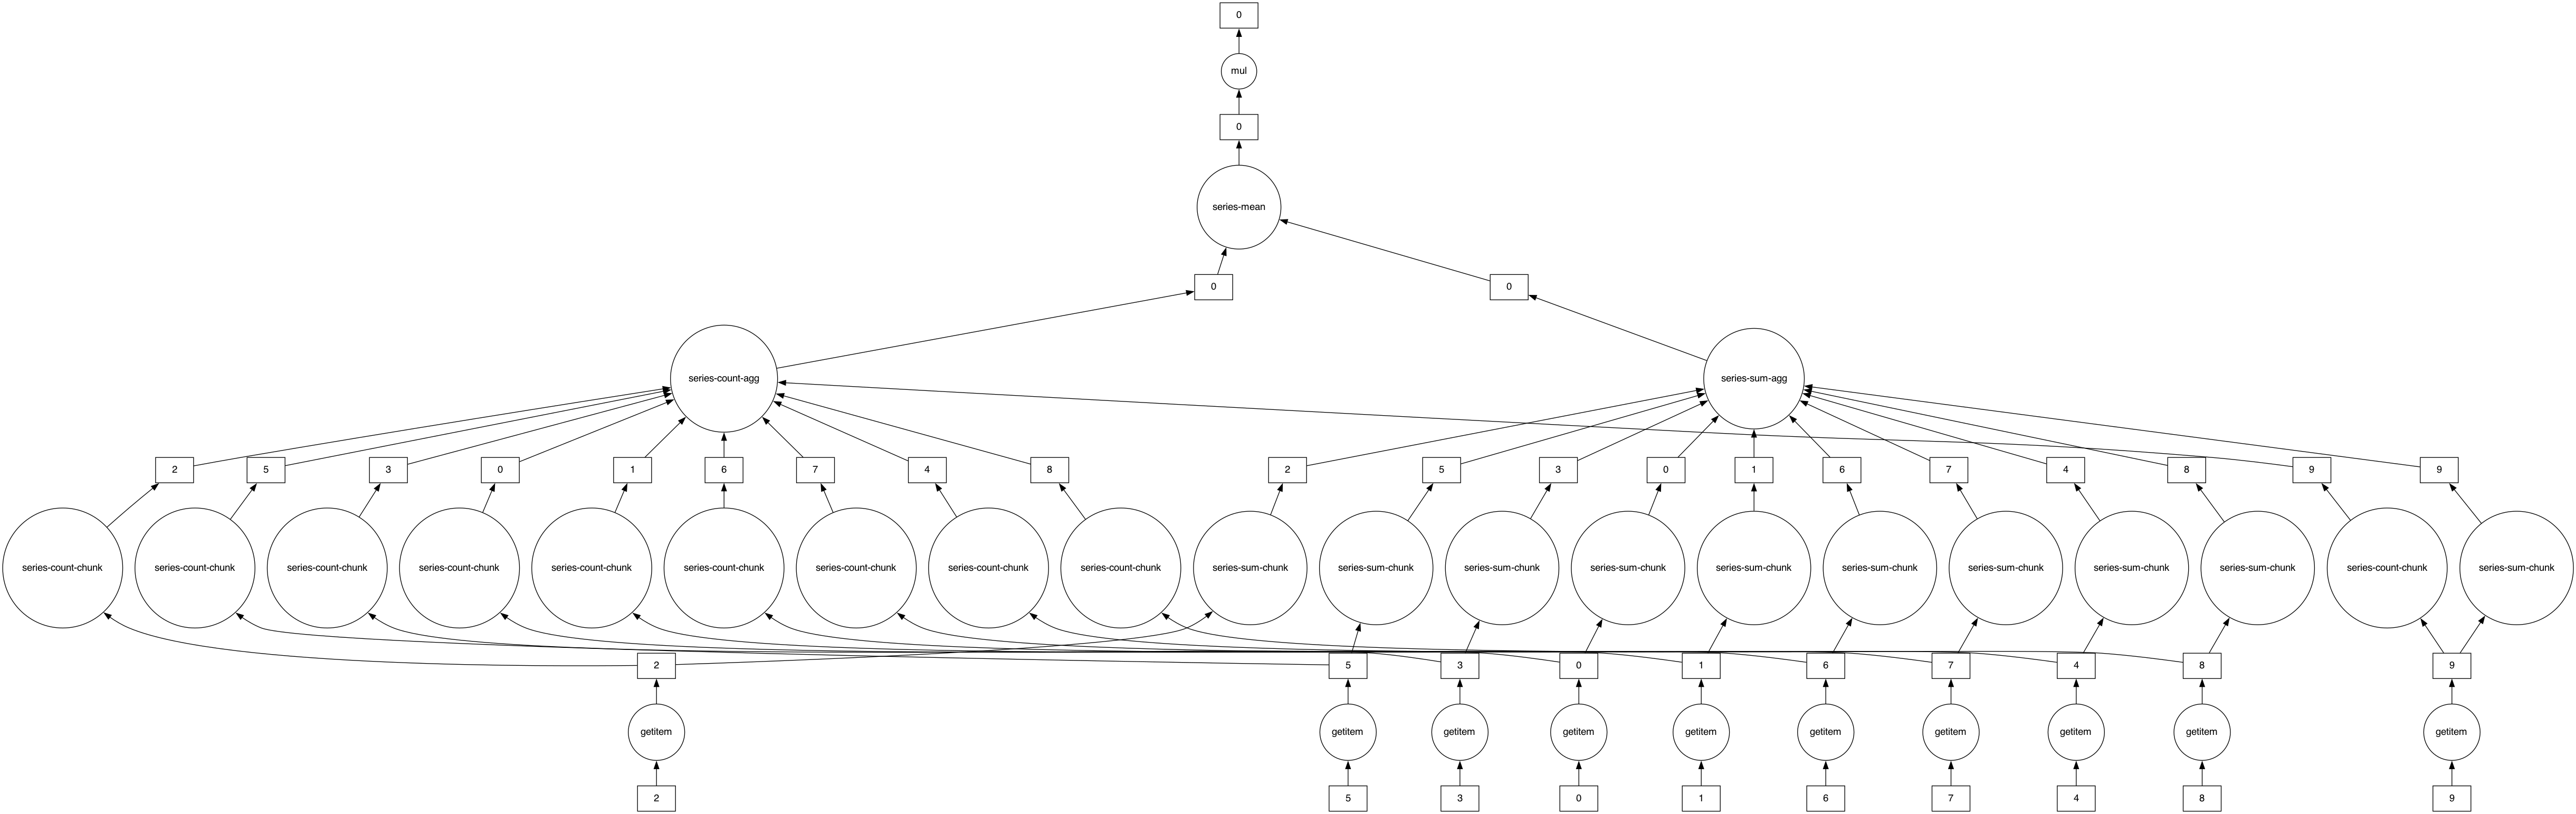

In [15]:
result.visualize()